In [1]:
import subprocess
import time
import json
import matplotlib.pyplot as plt 
import csv 
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns  
import pickle
from itertools import islice
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

In [2]:
#fee_per_vbyte_block_csv = open('/home/oscar/jufobtc/code/fee_vybte_per_block_650000_657000.csv','r')
fee_per_vbyte_block_csv = open('/home/oscar/jufobtc/code/avg_fpvb_650000_700000.csv','r')
colnames = ['time_stamp', 'block_height', 'avg_fee_block']
df_avg_fee_block = pd.read_csv(fee_per_vbyte_block_csv,delimiter=' ', names=colnames)
#print(df_avg_fee_block.loc[df_avg_fee_block['block_height']<0])
#print(df_avg_fee_block)

In [19]:
delta_b = 144 #Blockintervall

df_avg_fee_block.sort_values(by='block_height')
df_avg_fee_block['block_time'] = df_avg_fee_block['time_stamp'].diff(periods=1)
df_avg_fee_block['block_time'] = df_avg_fee_block['block_time']/60 # in Minuten umrechnen
df_avg_fee_block['moving_average_fee'] = df_avg_fee_block['avg_fee_block'].rolling(144).mean()
df_avg_fee_block['change_fee'] = df_avg_fee_block['avg_fee_block'].diff()
df_avg_fee_block['change_trend'] = df_avg_fee_block['change_fee'].rolling(delta_b).sum()
#df_avg_fee_block['change_trend_ma'] = df_avg_fee_block['moving_average_fee'].rolling(24*6).sum()

df_avg_fee_block['anomaly'] = ((df_avg_fee_block['avg_fee_block']-df_avg_fee_block['moving_average_fee'])>150) | ((df_avg_fee_block['avg_fee_block']-df_avg_fee_block['moving_average_fee'])<-75)


print(df_avg_fee_block)
#print(df_avg_fee_block.loc[df_avg_fee_block['anomaly']==True])

      time_stamp  block_height  avg_fee_block   block_time  \
143   1601160006        650144      18.017788          NaN   
144   1601160340        650145       9.450011     5.566667   
145   1601160872        650146      20.075773     8.866667   
146   1601161054        650147       6.511769     3.033333   
414   1601324321        650415      73.312845  2721.116667   
...          ...           ...            ...          ...   
5991  1604848464        655992      34.296245    20.350000   
5995  1604851572        655996      11.411304    51.800000   
5996  1604852214        655997     118.698360    10.700000   
5997  1604852235        655998       6.515449     0.350000   
5998  1604852446        655999      17.717582     3.516667   

      moving_average_fee  change_fee  change_trend  anomaly  \
143                  NaN         NaN           NaN    False   
144                  NaN   -8.567777           NaN    False   
145                  NaN   10.625762           NaN    False   
146

In [4]:
conf_time_csv = open('/home/oscar/jufobtc/code/test_comp_time.csv','r')
colnames = ['time_stamp', 'conf_time','block_height']
df_conf_time = pd.read_csv(conf_time_csv,delimiter=' ', names=colnames)
print('df loaded')
#print(df_conf_time)


df loaded


In [5]:
fee_per_tx_block_650000_659998_csv = open('/home/oscar/jufobtc/fee_block_650000_659998.csv','r')
df_tx_fee = pd.read_csv(fee_per_tx_block_650000_659998_csv,delimiter=' ', names=['tx_hash', 'tx_fee','block_height'])
print(df_tx_fee)

                                                    tx_hash      tx_fee  \
0         8143b3b341f665b22adcb8489158356c03f7c93cf4e4fa...    0.000000   
1         c17d8179d792928bb017d12654cd12c72aca35ca0cb258...  475.270769   
2         a795b27a52e74f07bf9def3edad50a06db902ee173d30b...  338.053097   
3         c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...  332.492147   
4         35064cb6846becca4594ccb45814a838039be1f08d3c04...  301.204819   
...                                                     ...         ...   
21359491  76daccf3b2067d63e6176f65d0cb4a576da19d83c3c479...    8.064343   
21359492  b2ceb2cf53b224917093c9d2639660976fdc2be3c7c92d...    8.064343   
21359493  5f376f04982af7066200a04ad4e490c1733055ffe8857b...    8.064343   
21359494  69e9cf4af9f34f21498942cf8e2fcb286b6527b2b4eeb7...    8.060150   
21359495  6d3c661fa221649e20e8f960e60231e691836452394189...    8.046243   

          block_height  
0               650000  
1               650000  
2               650000  

In [6]:
df_conf_time_fee_per_tx = pd.DataFrame(columns=['tx_hash','conf_time','tx_fee','block_height'])
df_conf_time_fee_per_tx['tx_hash'] = df_tx_fee['tx_hash']
df_conf_time_fee_per_tx['conf_time'] = df_conf_time['conf_time']
df_conf_time_fee_per_tx['tx_fee'] = df_tx_fee['tx_fee']
df_conf_time_fee_per_tx['conf_time'] = df_conf_time_fee_per_tx['conf_time']/60 # in Min umgerechnet
df_conf_time_fee_per_tx['block_height'] = df_tx_fee['block_height']
print(df_conf_time_fee_per_tx)

                                                    tx_hash  conf_time  \
0         8143b3b341f665b22adcb8489158356c03f7c93cf4e4fa...   3.517750   
1         c17d8179d792928bb017d12654cd12c72aca35ca0cb258...   1.911333   
2         a795b27a52e74f07bf9def3edad50a06db902ee173d30b...   2.376767   
3         c1b7b41cc7bc40fe528a08528ae150e2fdab6aa8501dd1...   1.422300   
4         35064cb6846becca4594ccb45814a838039be1f08d3c04...   2.149017   
...                                                     ...        ...   
21359491  76daccf3b2067d63e6176f65d0cb4a576da19d83c3c479...        NaN   
21359492  b2ceb2cf53b224917093c9d2639660976fdc2be3c7c92d...        NaN   
21359493  5f376f04982af7066200a04ad4e490c1733055ffe8857b...        NaN   
21359494  69e9cf4af9f34f21498942cf8e2fcb286b6527b2b4eeb7...        NaN   
21359495  6d3c661fa221649e20e8f960e60231e691836452394189...        NaN   

              tx_fee  block_height  
0           0.000000        650000  
1         475.270769        650000  


In [7]:
df_block_fee_conf_time = pd.DataFrame(columns=['conf_time','avg_fee_block','block_height'])
df_block_fee_conf_time['conf_time'],df_block_fee_conf_time['block_height'] = df_conf_time['conf_time']/60, df_conf_time['block_height']
#print(df_block_fee_conf_time)
#df_block_fee_conf_time['avg_fee_block'] = df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['block_height']==df_block_fee_conf_time['block_height']]
#dict_avg_fee_block = df_avg_fee_block.set_index('block_height').T.to_dict('list')
df_avg_fee_block_two_row = pd.DataFrame(columns=['block_height','avg_fee_block'])
df_avg_fee_block_two_row['block_height'],df_avg_fee_block_two_row['avg_fee_block'] = df_avg_fee_block['block_height'], df_avg_fee_block['avg_fee_block']
dict_avg_fee_block = df_avg_fee_block_two_row.to_dict()
#df_block_fee_conf_time['avg_fee_block'] = df_avg_fee_block['avg_fee_block']
dict_avg_fee_block[650000] = 24.453589030036483
df_block_fee_conf_time['avg_fee_block'] = df_block_fee_conf_time['block_height'].map(dict_avg_fee_block)
df_block_fee_conf_time = pd.merge(df_block_fee_conf_time, df_avg_fee_block, on='block_height')
df_block_fee_conf_time['cleaned_conf_time'] = df_block_fee_conf_time['conf_time'] - df_block_fee_conf_time['block_time']




In [8]:
print(df_block_fee_conf_time)

           conf_time avg_fee_block_x  block_height  time_stamp  \
0           1.738383             NaN        650001  1601077461   
1           3.534450             NaN        650001  1601077461   
2           0.674417             NaN        650001  1601077461   
3           4.561067             NaN        650001  1601077461   
4           1.911383             NaN        650001  1601077461   
...              ...             ...           ...         ...   
9897380  5276.190433             NaN        656225  1604967510   
9897381  5271.499550             NaN        656225  1604967510   
9897382  5270.666483             NaN        656225  1604967510   
9897383  5276.865150             NaN        656225  1604967510   
9897384  5276.865150             NaN        656225  1604967510   

         avg_fee_block_y  block_time  moving_average_fee  change_fee  \
0              22.292135         NaN                 NaN         NaN   
1              22.292135         NaN                 NaN       

In [9]:
dict = {}

for block_height in range(650000,656000):
    data = df_block_fee_conf_time.loc[df_block_fee_conf_time['block_height']==block_height]
    dict[block_height] = data['cleaned_conf_time'].median()
    #df_block_fee_conf_time['median_conf_time_block'].loc[df_block_fee_conf_time['block_height']==block_height] = df_block_fee_conf_time['conf_time'].loc[df_block_fee_conf_time['block_height']==block_height].median()
df_avg_fee_block['median_conf_time_block'] = df_avg_fee_block['block_height'].map(dict)    
df_block_fee_conf_time['median_conf_time_block'] = df_block_fee_conf_time['block_height'].map(dict)    


In [68]:
k = 0
df_temp = df_block_fee_conf_time
df_temp['sign_median_conf_time'] = 0
df_temp['sign_change_trend'] = 0
df_avg_fee_block['sign_change_trend'] = 0
df_avg_fee_block['sign_change_fee'] = 0
df_temp['sign_median_conf_time'].loc[df_temp['median_conf_time_block']>0] = 'positive'
df_temp['sign_median_conf_time'].loc[df_temp['median_conf_time_block']<0] = 'negative'
df_temp['sign_change_trend'].loc[df_temp['change_trend']>k] = 'positive'
df_temp['sign_change_trend'].loc[df_temp['change_trend']<-k] = 'negative'
df_avg_fee_block['sign_change_trend'].loc[df_avg_fee_block['change_trend']>0] = 'positive'
df_avg_fee_block['sign_change_trend'].loc[df_avg_fee_block['change_trend']<-0] = 'negative'



/tmp/ipykernel_5638/1018309195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['sign_median_conf_time'].loc[df_temp['median_conf_time_block']>0] = 'positive'
/tmp/ipykernel_5638/1018309195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['sign_change_trend'].loc[df_temp['change_trend']>k] = 'positive'
/tmp/ipykernel_5638/1018309195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg_fee_block['sign_change

In [75]:
df_avg_fee_block['sign_change_fee'].loc[df_avg_fee_block['change_fee']>0] = 'positive'
df_avg_fee_block['sign_change_fee'].loc[df_avg_fee_block['change_fee']<0] = 'negative'

In [72]:
print(df_avg_fee_block['sign_change_fee'].loc[df_avg_fee_block['change_fee']>k])

557     postive
558     postive
559     postive
562     postive
564     postive
         ...   
5985    postive
5988    postive
5991    postive
5996    postive
5998    postive
Name: sign_change_fee, Length: 2068, dtype: object


(array([1.58604282e-05, 1.58604282e-05, 1.58604282e-05, ...,
        9.99984140e-01, 9.99984140e-01, 1.00000000e+00]),
 array([-31.85      , -31.83289167, -31.81578333, ..., 139.19911667,
        139.216225  , 139.23333333]),
 [<matplotlib.patches.Polygon at 0x7fe8b5d122d0>])

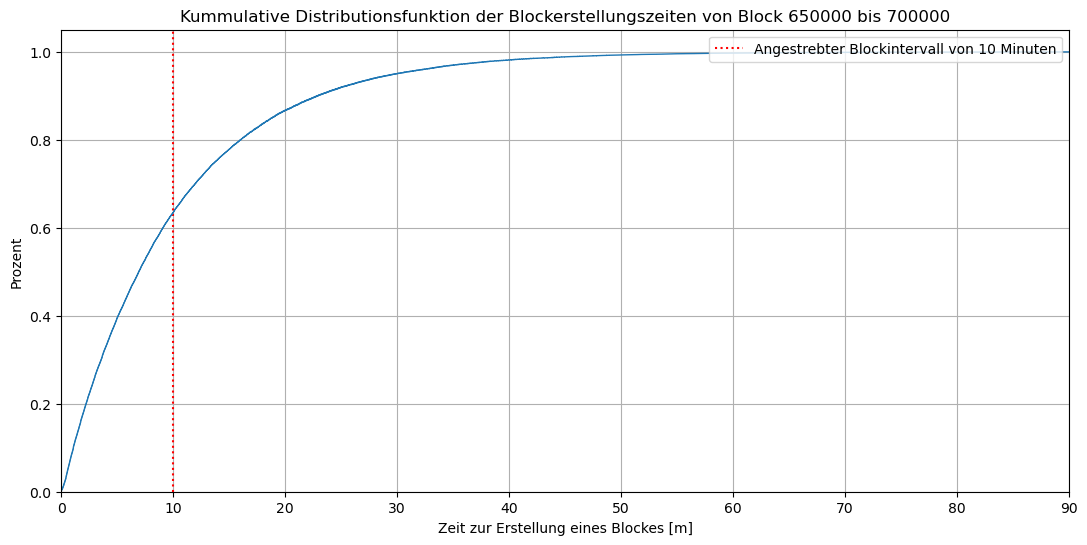

In [13]:
start, end = 650000, 700000
plt.figure(figsize=(13,6))
plt.title('Kummulative Distributionsfunktion der Blockerstellungszeiten von Block {} bis {}'.format(start, end))
plt.ylabel('Prozent')
plt.xlabel('Zeit zur Erstellung eines Blockes [m]')
plt.axvline(x=10, ls=':', c='red',label='Angestrebter Blockintervall von 10 Minuten')
list = []
for i in range(0,14):
    list.append(i*10)
plt.xticks(list)
plt.grid()
plt.xlim(0,90)
plt.legend(loc=('upper right'))
plt.hist(df_avg_fee_block['block_time'],histtype='step',bins=10000, density=True, cumulative=True)


[653500, 653644, 653788, 653932, 654076, 654220]


(0.0, 420.2143501982913)

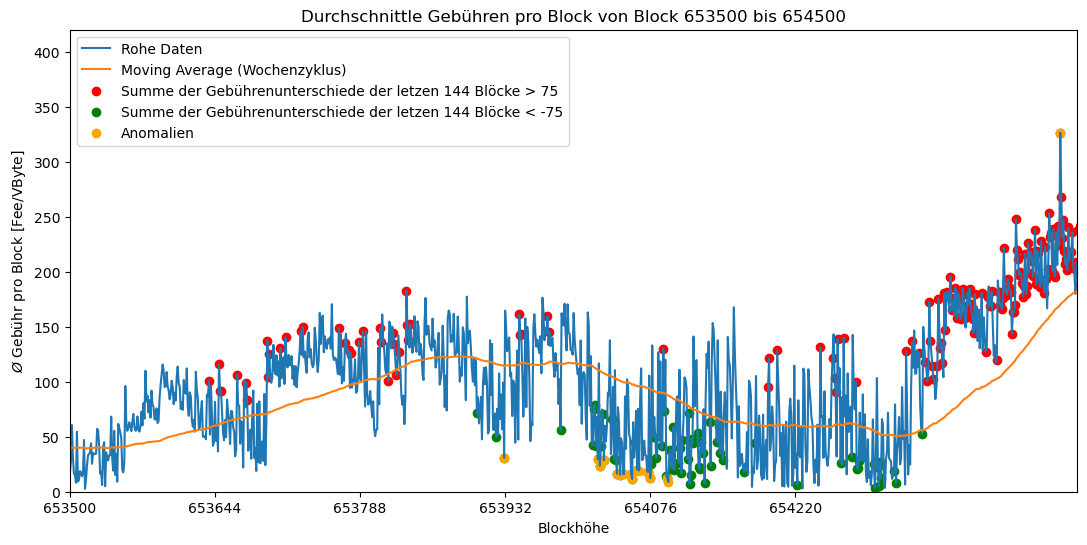

In [20]:
start, end = 653500, 654500
threshhold = 75
neg_threshold = threshhold*(-1)
x_step_size = 144
list = []
for i in range(0,int((end-start)/144)):
    list.append(i*144+start)

print(list)


plt.figure(figsize=(13,6))
plt.xticks(list)
df_avg_fee_block = df_avg_fee_block.dropna()
df_avg_fee_block.sort_values(by='block_height')
plt.plot(df_avg_fee_block['block_height'].loc[df_avg_fee_block['block_height']<end],df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['block_height']<end],label='Rohe Daten')
plt.plot(df_avg_fee_block['block_height'],df_avg_fee_block['moving_average_fee'], label='Moving Average (Wochenzyklus)')
plt.scatter(x=df_avg_fee_block['block_height'].loc[df_avg_fee_block['change_trend']>threshhold], y=df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['change_trend']>threshhold], c='red',label='Summe der Gebührenunterschiede der letzen ' + str(delta_b) + ' Blöcke > {}'.format(threshhold))
#plt.scatter(x=df_avg_fee_block['block_height'].loc[df_avg_fee_block['change_trend_ma']>threshhold], y=df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['change_trend_ma']>threshhold], c='pink',label='Summe der average Gebührenunterschiede der letzen ' + str(delta_b) + ' Blöcke > {}'.format(threshhold))
plt.scatter(x=df_avg_fee_block['block_height'].loc[df_avg_fee_block['change_trend']<neg_threshold], y=df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['change_trend']<neg_threshold], c='green',label='Summe der Gebührenunterschiede der letzen ' + str(delta_b) + ' Blöcke < {}'.format(neg_threshold))
plt.scatter(x=df_avg_fee_block['block_height'].loc[df_avg_fee_block['anomaly']==True], y=df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['anomaly']==True], c='orange', label='Anomalien')
plt.xlim(start, end)
plt.title('Durchschnittle Gebühren pro Block von Block {} bis {}'.format(start, end))
plt.ylabel('$\O$ Gebühr pro Block [Fee/VByte]')
plt.xlabel('Blockhöhe')
plt.legend(loc='upper left')
plt.ylim(0,None)


Wendepunkt bei ca 654000
- Conf time cdf plotten
- bereinigen von blocktimes

6019826    -1.477150
6019827    -4.667083
6019828    -9.055600
6019829   -14.742250
6019830    -6.693417
             ...    
6022314   -15.594650
6022315    -9.567567
6022316    -7.549800
6022317    -4.137383
6022318    -9.272017
Name: cleaned_conf_time, Length: 2493, dtype: float64


Text(0.5, 1.0, 'Kummullierte Verteilung der Transaktionsbestätigungszeiten von Block 653932 bis 653680 in 36er-Schrittlänge')

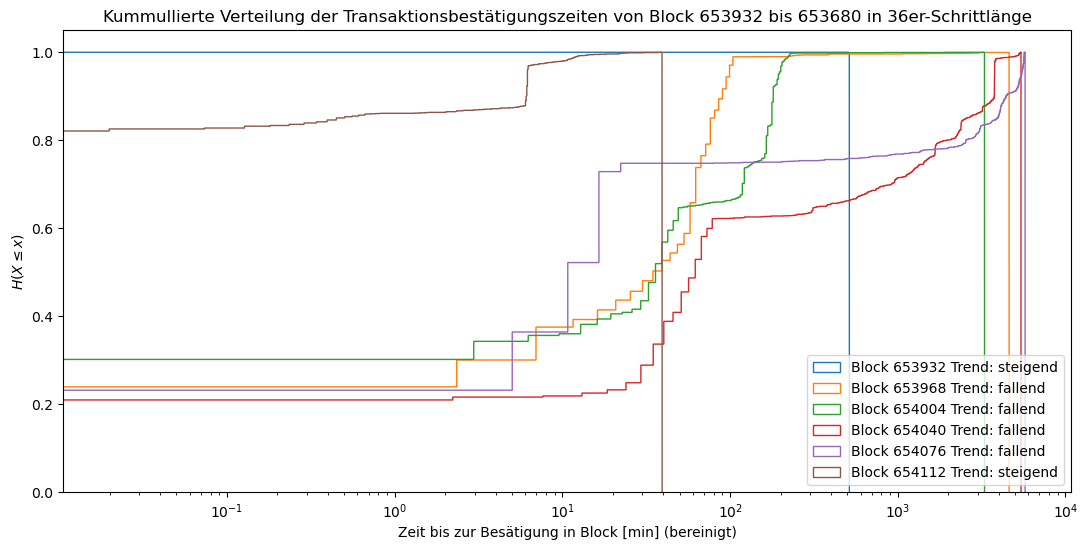

In [21]:
step_size = 36
step_count = 6
start, end = 653932, start+(step_size*step_count)
    
    

print(df_block_fee_conf_time['cleaned_conf_time'].loc[df_block_fee_conf_time['block_height'] == 654226])
plt.figure(figsize=(13,6))
#plt.xlim(0,400)12
plt.ylabel('$H(X \leq x)$')
plt.xlabel('Zeit bis zur Besätigung in Block [min] (bereinigt)')
for i in range(0, step_count):
    step = i * step_size
    data = df_block_fee_conf_time.loc[df_block_fee_conf_time['block_height'] == int(start + step)]
    data.index = range(len(data.index))
    
    if int(data['change_trend'].loc[[1]].item()) > 0: trend = 'steigend'
    elif int(data['change_trend'].loc[[1]].item()) < -0: trend = 'fallend'
    #elif int(data['change_trend'].loc[[1]].item()) < 5 and int(data['change_trend'].loc[[7]].item()) > -5: trend = 'konstant oder Wendepunkt'

    
    label = 'Block ' + str(start + step) + ' Trend: ' + str(trend) #+ ' ' +  str(data['change_trend'].loc[[1]].item())
    plt.hist(data['cleaned_conf_time'],cumulative=True, density=True, histtype='step', bins=1000, label=label) #color=data['block_height']
#plt.plot(df_block_fee_conf_time['cleaned_conf_time'])
plt.axvline(x=0, color='grey')
plt.xscale('log')
plt.legend(loc='lower right')
plt.title('Kummullierte Verteilung der Transaktionsbestätigungszeiten von Block {} bis {} in {}er-Schrittlänge'.format(start, end-step_size, step_size))

#plt.xlim(0,2.5)
#plt.axline(xy1=(0,0.5), xy2=(1,0.5))


FÜR DOKU:

Nutzen verdeutlichen


6019826    -1.477150
6019827    -4.667083
6019828    -9.055600
6019829   -14.742250
6019830    -6.693417
             ...    
6022314   -15.594650
6022315    -9.567567
6022316    -7.549800
6022317    -4.137383
6022318    -9.272017
Name: cleaned_conf_time, Length: 2493, dtype: float64


Text(0.5, 1.0, 'Median der Transaktionsbestätigungszeiten von Block 653932 bis 654112 in 36er-Schrittlänge')

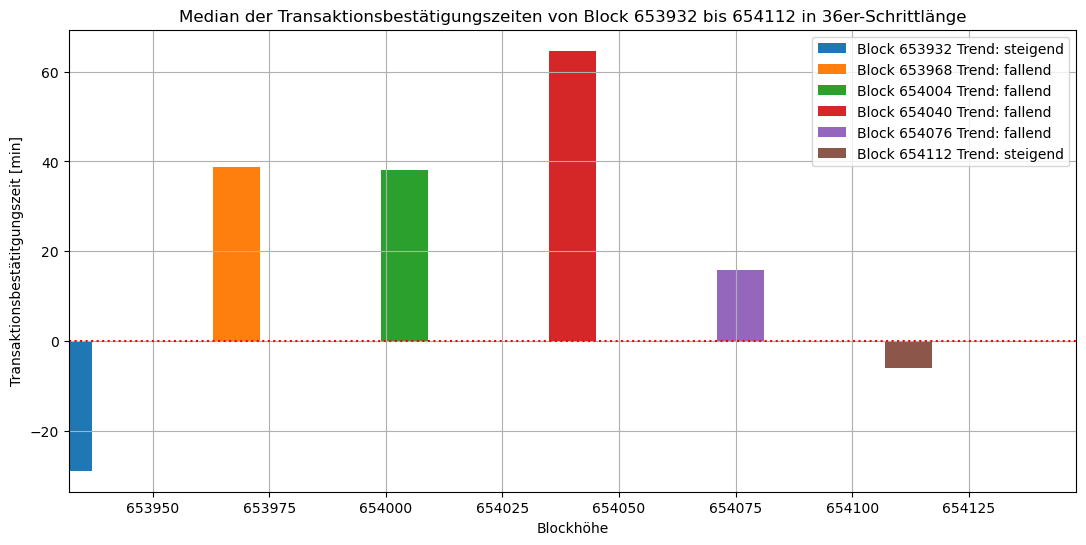

In [17]:
step_size = 36
step_count = 6
start, end = 653932, start+(step_size*step_count)
    
    

print(df_block_fee_conf_time['cleaned_conf_time'].loc[df_block_fee_conf_time['block_height'] == 654226])
plt.figure(figsize=(13,6))
plt.xlim(start,end)
plt.xlabel('Blockhöhe')
plt.ylabel('Transaktionsbestätitgungszeit [min]')
for i in range(0, step_count):
    step = i * step_size
    data = df_block_fee_conf_time.loc[df_block_fee_conf_time['block_height'] == int(start + step)]
    data.index = range(len(data.index))
    
    if int(data['change_trend'].loc[[1]].item()) > 0: trend = 'steigend'
    elif int(data['change_trend'].loc[[1]].item()) < -0: trend = 'fallend'
    #elif int(data['change_trend'].loc[[1]].item()) < 5 and int(data['change_trend'].loc[[7]].item()) > -5: trend = 'konstant oder Wendepunkt'

    
    label = 'Block ' + str(start + step) + ' Trend: ' + str(trend)# + ' ' +  str(data['change_trend'].loc[[1]].item
    plt.bar(x=data['block_height'][1] , height=data['cleaned_conf_time'].median(),width=10, label=label) #color=data['block_height']
    
#plt.plot(df_block_fee_conf_time['cleaned_conf_time'])
plt.axvline(x=0, color='grey')
plt.axhline(y=0,color='red',ls=':')
plt.grid()
#plt.xscale('log')
plt.legend(loc='upper right')
plt.title('Median der Transaktionsbestätigungszeiten von Block {} bis {} in {}er-Schrittlänge'.format(start, end-step_size, step_size))

In [ ]:
#plt.scatter(x=df_block_fee_conf_time['avg_fee_block_x'], y=df_block_fee_conf_time['cleaned_conf_time'].median())
print(df_avg_fee_block.loc[df_avg_fee_block['block_height']==650002])

   time_stamp  block_height  avg_fee_block  block_time  moving_average_fee  \
1  1601077784        650002      21.040189    5.383333                 NaN   

   change_fee  change_trend  anomaly  
1   -1.251946           NaN    False  


In [ ]:
print(df_block_fee_conf_time['median_conf_time_block'].loc[df_block_fee_conf_time['block_height']==656222])

9896824   NaN
9896825   NaN
9896826   NaN
9896827   NaN
9896828   NaN
9896829   NaN
9896830   NaN
9896831   NaN
9896832   NaN
Name: median_conf_time_block, dtype: float64


In [ ]:
""""
#print(df_block_fee_conf_time['cleaned_conf_time'].loc[df_block_fee_conf_time['block_height'] == 654226])
plt.figure(figsize=(13,6))
plt.xlim(start,end)

plt.title('Median der Transaktionsbestätigungszeiten (bereinigt) für positiven / negativen Gebührentrend')
plt.xlabel('Blockhöhe')
plt.ylabel('Median der Transaktionsbestätigungszeiten [min]')

for block in df_block_fee_conf_time['block_height'].unique():
    #step = i * step_size
    data = df_block_fee_conf_time.loc[df_block_fee_conf_time['block_height'] == int(block)]
    data.index = range(len(data.index))
    print(data['change_trend'])
    if data['change_trend'].iloc[[1]].unique() > 0:
        color = 'red'
        label = 'steigender Trend'
    elif data['change_trend'].iloc[[1]].unique() < -0: 
        color = 'green'
        label='sinkender Trend'
    #elif int(data['change_trend'].loc[[1]].item()) < 5 and int(data['change_trend'].loc[[7]].item()) > -5: trend = 'konstant oder Wendepunkt'
    
    plt.scatter(x=data['block_height'].iloc[1] , y=data['cleaned_conf_time'].median(), label=label) #color=data['block_height']
    
#plt.plot(df_block_fee_conf_time['cleaned_conf_time'])
plt.axvline(x=0, color='grey')
plt.axhline(y=0,color='red',ls=':')
plt.grid
#plt.xscale('log')
plt.legend(loc='upper right')
plt.title('Median der Transaktionsbestätigungszeiten von Block {} bis {} in {}er-Schrittlänge'.format(start, end-step_size, step_size))
"""

'"\n#print(df_block_fee_conf_time[\'cleaned_conf_time\'].loc[df_block_fee_conf_time[\'block_height\'] == 654226])\nplt.figure(figsize=(13,6))\nplt.xlim(start,end)\n\nplt.title(\'Median der Transaktionsbestätigungszeiten (bereinigt) für positiven / negativen Gebührentrend\')\nplt.xlabel(\'Blockhöhe\')\nplt.ylabel(\'Median der Transaktionsbestätigungszeiten [min]\')\n\nfor block in df_block_fee_conf_time[\'block_height\'].unique():\n    #step = i * step_size\n    data = df_block_fee_conf_time.loc[df_block_fee_conf_time[\'block_height\'] == int(block)]\n    data.index = range(len(data.index))\n    print(data[\'change_trend\'])\n    if data[\'change_trend\'].iloc[[1]].unique() > 0:\n        color = \'red\'\n        label = \'steigender Trend\'\n    elif data[\'change_trend\'].iloc[[1]].unique() < -0: \n        color = \'green\'\n        label=\'sinkender Trend\'\n    #elif int(data[\'change_trend\'].loc[[1]].item()) < 5 and int(data[\'change_trend\'].loc[[7]].item()) > -5: trend = \'konsta

In [ ]:
""""
data = pd.DataFrame(columns=['block_height','sign_change_trend','median_conf_time_block'])

data['block_height'] = df_temp['block_height'].unique()

for block_height in data['block_height']:
    temp_data = df_temp.loc[df_temp['block_height']==block_height]
    temp_data.reset_index()
    data['median_conf_time_block'].loc[data['block_height']==block_height] = temp_data['median_conf_time_block'][[1]]
    data['sign_change_trend'].loc[data['block_height']==block_height] = temp_data['sign_change_trend'][[1]]
    #,'sign_change_trend','median_conf_time_block'
    

list = ['positive','negative']

print(data)
"""


'"\ndata = pd.DataFrame(columns=[\'block_height\',\'sign_change_trend\',\'median_conf_time_block\'])\n\ndata[\'block_height\'] = df_temp[\'block_height\'].unique()\n\nfor block_height in data[\'block_height\']:\n    temp_data = df_temp.loc[df_temp[\'block_height\']==block_height]\n    temp_data.reset_index()\n    data[\'median_conf_time_block\'].loc[data[\'block_height\']==block_height] = temp_data[\'median_conf_time_block\'][[1]]\n    data[\'sign_change_trend\'].loc[data[\'block_height\']==block_height] = temp_data[\'sign_change_trend\'][[1]]\n    #,\'sign_change_trend\',\'median_conf_time_block\'\n    \n\nlist = [\'positive\',\'negative\']\n\nprint(data)\n'

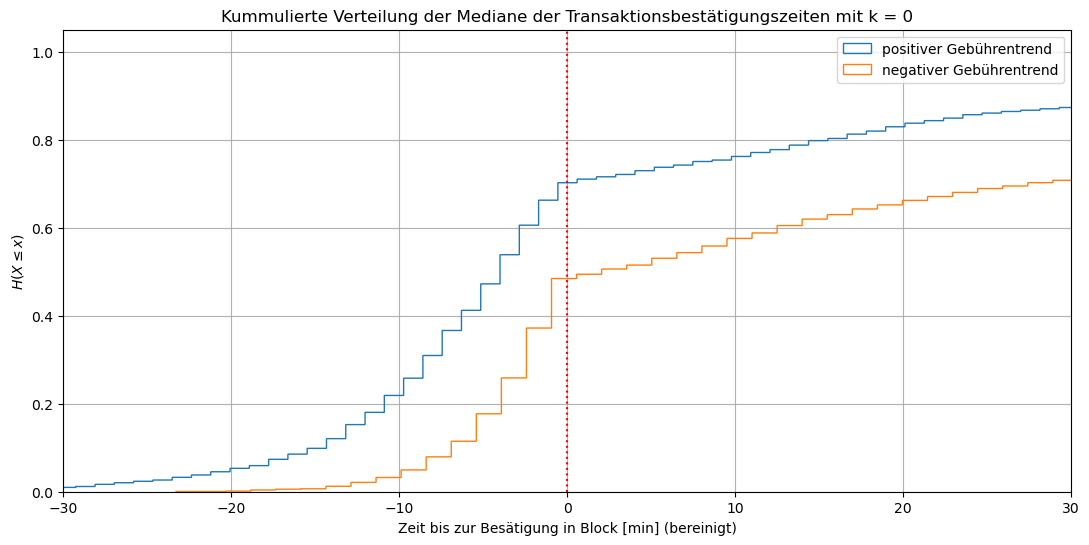

In [22]:
list = ['positive','negative']
plt.figure(figsize=(13,6))
plt.ylabel('$H(X \leq x)$')
plt.xlabel('Zeit bis zur Besätigung in Block [min] (bereinigt)')
plt.title('Kummulierte Verteilung der Mediane der Transaktionsbestätigungszeiten mit k = {}'.format(k))
for sign in list:
    label = sign + 'r Gebührentrend'
    plt.hist(x=df_temp['median_conf_time_block'].loc[df_temp['sign_change_trend']==sign].unique(),bins=10000,histtype='step',density=True, cumulative=True, label=label)
plt.xlim(-30,30)

#plt.xscale('lin')
plt.axvline(x=0, c='red', ls=':')
plt.grid()
plt.legend()

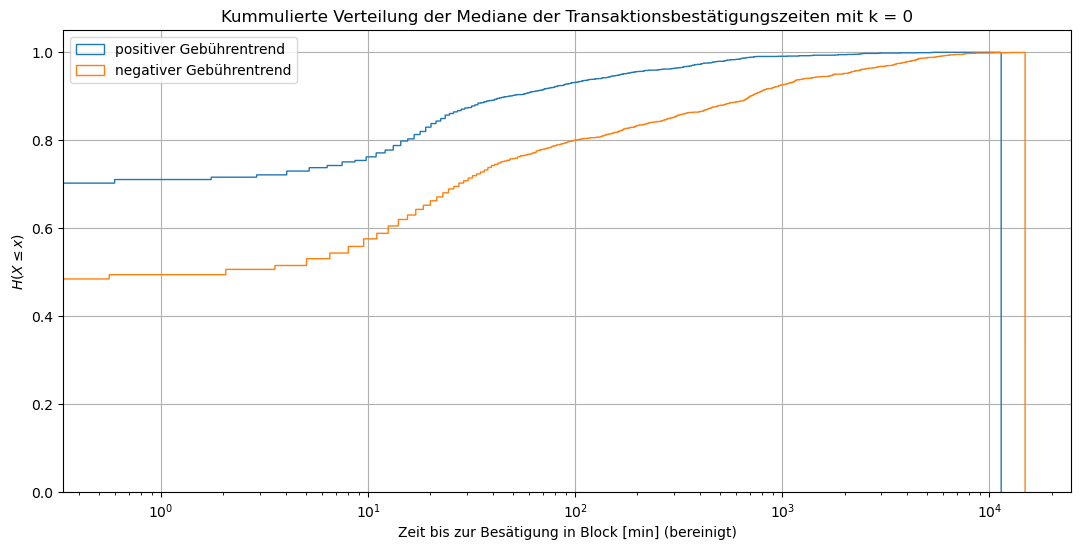

In [31]:
list = ['positive','negative']
plt.figure(figsize=(13,6))
plt.ylabel('$H(X \leq x)$')
plt.xlabel('Zeit bis zur Besätigung in Block [min] (bereinigt)')
plt.title('Kummulierte Verteilung der Mediane der Transaktionsbestätigungszeiten mit k = {}'.format(k))
for sign in list:
    label = sign + 'r Gebührentrend'
    plt.hist(x=df_temp['median_conf_time_block'].loc[df_temp['sign_change_trend']==sign].unique(),bins=10000,histtype='step',density=True, cumulative=True, label=label)
#plt.xlim(-400,1000)
plt.xscale('log')
plt.axvline(x=0, c='red', ls=':')
plt.grid()
plt.legend()

Text(0.5, 0, 'Transaktionsbestätigungszeit [min]')

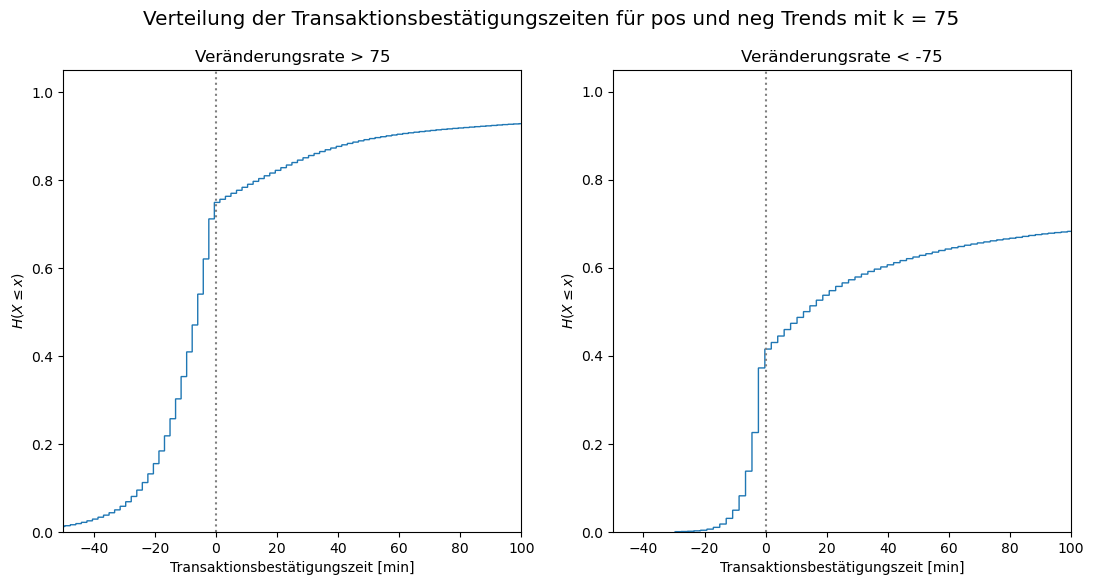

In [23]:
k = 75


plt.rcdefaults()
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Veränderungsrate > '+ str(k))
plt.hist(df_block_fee_conf_time['cleaned_conf_time'].loc[df_block_fee_conf_time['change_trend']>k],bins=10000, density=True, cumulative=True,histtype='step')
plt.xlim(-50,100)
plt.axvline(x=0,c='grey',ls=':')
plt.ylabel('$H(X \leq x)$')
plt.xlabel('Transaktionsbestätigungszeit [min]')

plt.subplot(1,2,2)
plt.title('Veränderungsrate < -' + str(k))
plt.hist(df_block_fee_conf_time['cleaned_conf_time'].loc[df_block_fee_conf_time['change_trend']<(-k)],bins=10000, density=True, cumulative=True,histtype='step')
plt.xlim(-50,100)
plt.axvline(x=0,c='grey',ls=':')
plt.rcParams["figure.titlesize"] = 'x-large'
plt.suptitle('Verteilung der Transaktionsbestätigungszeiten für pos und neg Trends mit k = {}'.format(k))
plt.ylabel('$H(X \leq x)$')
plt.xlabel('Transaktionsbestätigungszeit [min]')


In [74]:
print(df_avg_fee_block['sign_change_fee'])

555     negative
557      postive
558      postive
559      postive
560     negative
          ...   
5991     postive
5995    negative
5996     postive
5997    negative
5998     postive
Name: sign_change_fee, Length: 4489, dtype: object


['positive', 'negative']
positive
blue


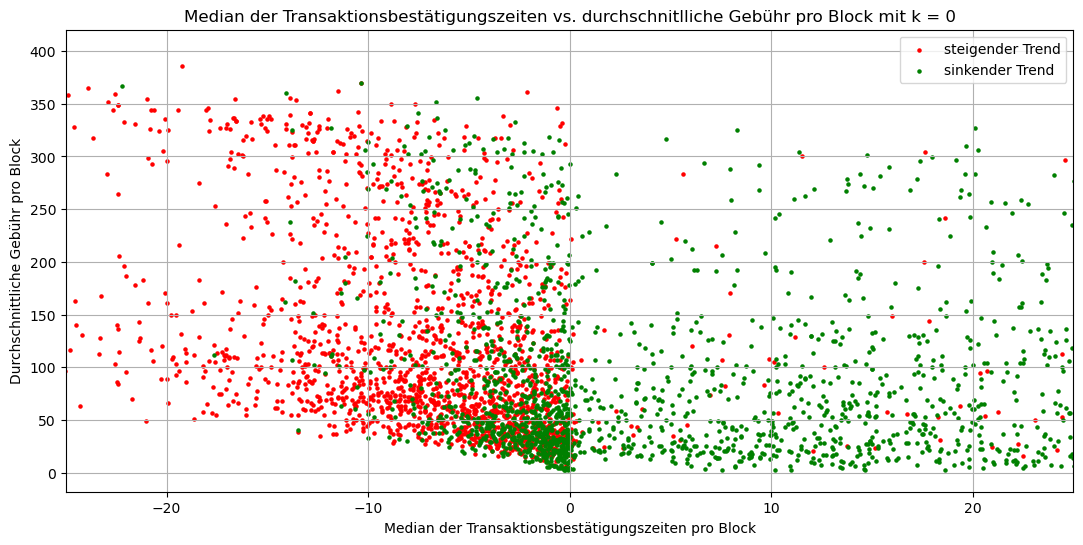

In [76]:
print(list)
list = ['positive', 'negative']
plt.figure(figsize=(13,6))
for sign in list:
 
    if sign == 'negative':
        print('blue')
        color = 'green'
        label='sinkender Trend'
        
    if sign == 'positive':
        print('positive')
        color = 'red'
        label = 'steigender Trend'
    
    plt.scatter(y=df_avg_fee_block['avg_fee_block'].loc[df_avg_fee_block['sign_change_fee']==sign],x=df_avg_fee_block['median_conf_time_block'].loc[df_avg_fee_block['sign_change_fee']==sign],s=5,c=color,label=label)
plt.ylabel('Durchschnittliche Gebühr pro Block')
plt.xlabel('Median der Transaktionsbestätigungszeiten pro Block')
plt.title('Median der Transaktionsbestätigungszeiten vs. durchschnitlliche Gebühr pro Block mit k = {}'.format(k))

#plt.yscale('log')
plt.xlim(-25,25)
plt.legend()
plt.grid()